In [105]:
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

%matplotlib inline

# process map
# Hypothesis Definition
# Data Cleaning and Preparation
# Exploration and Visualization
# Split Data by Test and Control Groups
# Sample Size and Assumptions Validation
# Statistical Testing (Proportion Test or Chi-Square)
# Calculate Lift and Confidence Intervals
# Interpretation and Business Impact
# Automation 

In [106]:
test=pd.read_csv("C:/Users/chenl/Data Science prep/data/test_table (Spanish Translation AB Test).csv")
user=pd.read_csv("C:/Users/chenl/Data Science prep/data/user_table (Spanish Translation AB Test).csv")
print(user.head()) # user information database, need to merge into test
print(test.head())

   user_id sex  age    country
0   765821   M   20     Mexico
1   343561   F   27  Nicaragua
2   118744   M   23   Colombia
3   987753   F   27  Venezuela
4   554597   F   20      Spain
   user_id        date  source  device browser_language ads_channel  \
0   315281  2015-12-03  Direct     Web               ES         NaN   
1   497851  2015-12-04     Ads     Web               ES      Google   
2   848402  2015-12-04     Ads     Web               ES    Facebook   
3   290051  2015-12-03     Ads  Mobile            Other    Facebook   
4   548435  2015-11-30     Ads     Web               ES      Google   

       browser  conversion  test  
0           IE           1     0  
1           IE           0     1  
2       Chrome           0     0  
3  Android_App           0     1  
4      FireFox           0     1  


In [107]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           453321 non-null  int64 
 1   date              453321 non-null  object
 2   source            453321 non-null  object
 3   device            453321 non-null  object
 4   browser_language  453321 non-null  object
 5   ads_channel       181877 non-null  object
 6   browser           453321 non-null  object
 7   conversion        453321 non-null  int64 
 8   test              453321 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [108]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  452867 non-null  int64 
 1   sex      452867 non-null  object
 2   age      452867 non-null  int64 
 3   country  452867 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [109]:
test.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [110]:
user.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [111]:
# check unique ID for each row
print("test ID", len(test["user_id"].unique()), test["user_id"].nunique()==len(test))
print("test ID", len(user["user_id"].unique()), user["user_id"].nunique()==len(user))

test ID 453321 True
test ID 452867 True


In [112]:
data=pd.merge(test,user,how="left",on="user_id")
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           453321 non-null  int64  
 1   date              453321 non-null  object 
 2   source            453321 non-null  object 
 3   device            453321 non-null  object 
 4   browser_language  453321 non-null  object 
 5   ads_channel       181877 non-null  object 
 6   browser           453321 non-null  object 
 7   conversion        453321 non-null  int64  
 8   test              453321 non-null  int64  
 9   sex               452867 non-null  object 
 10  age               452867 non-null  float64
 11  country           452867 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 41.5+ MB


# data process

In [114]:
# null values - exam null value, error or as dataset natural
null_counts=data.isnull().sum()
null_counts

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
sex                    454
age                    454
country                454
dtype: int64

In [115]:
temp=data[data["sex"].isnull()]
print(temp.head())
# sex age country, null value seems like data collection issue, detele those 454 rows, minimum impact on dataset
data.dropna(subset=['sex', 'age', 'country'],inplace=True)

      user_id        date  source  device browser_language ads_channel  \
819    657841  2015-12-02     Ads  Mobile               ES        Bing   
1696   859340  2015-12-04  Direct  Mobile               EN         NaN   
1934   716487  2015-12-04     SEO  Mobile               ES         NaN   
2409    87209  2015-12-01  Direct     Web               ES         NaN   
2721   771642  2015-11-30     SEO  Mobile               ES         NaN   

          browser  conversion  test  sex  age country  
819   Android_App           0     0  NaN  NaN     NaN  
1696  Android_App           0     0  NaN  NaN     NaN  
1934  Android_App           0     0  NaN  NaN     NaN  
2409       Chrome           0     0  NaN  NaN     NaN  
2721  Android_App           0     0  NaN  NaN     NaN  


In [116]:
# ads_channel column NaN imply non-ads channel, hence replace with "other" value
data["ads_channel"].fillna("other",inplace=True)

# eda

In [117]:
for column in data.columns:
    uniques=sorted(data[column].unique())
    print(column,len(uniques),uniques[0:5])

user_id 452867 [1, 2, 3, 5, 8]
date 5 ['2015-11-30', '2015-12-01', '2015-12-02', '2015-12-03', '2015-12-04']
source 3 ['Ads', 'Direct', 'SEO']
device 2 ['Mobile', 'Web']
browser_language 3 ['EN', 'ES', 'Other']
ads_channel 6 ['Bing', 'Facebook', 'Google', 'Other', 'Yahoo']
browser 7 ['Android_App', 'Chrome', 'FireFox', 'IE', 'Iphone_App']
conversion 2 [0, 1]
test 2 [0, 1]
sex 2 ['F', 'M']
age 52 [18.0, 19.0, 20.0, 21.0, 22.0]
country 17 ['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa Rica']


# A/B test
H0: The new variant (test group) has no impact on conversion rate compared to the control group.


H1: he new variant has a statistically significant impact on the conversion rate compared to the control group.


In [118]:
control=data[data["test"]==0]
test=data[data["test"]==1]
print("control sample_size",len(control))
print("test sample_size",len(test))

control sample_size 237093
test sample_size 215774


In [119]:
data

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,other,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...
453316,425010,2015-12-04,SEO,Web,ES,other,FireFox,0,0,M,50.0,Mexico
453317,826793,2015-12-01,SEO,Mobile,ES,other,Android_App,0,1,F,20.0,Colombia
453318,514870,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0,M,25.0,Spain
453319,785224,2015-12-04,SEO,Mobile,ES,other,Android_App,0,1,M,21.0,Colombia


In [120]:
# high level A/B test
sample_data = data[data['country'] != 'Spain']
test_val=sample_data[sample_data["test"]==1]["conversion"].values
cont_val=sample_data[sample_data["test"]==0]["conversion"].values
print("mean conversion for test", test_val.mean())
print("mean conversion for control", cont_val.mean())
# seems like test group is worse

mean conversion for test 0.043411161678422794
mean conversion for control 0.04829179055749524


In [121]:
from statsmodels.stats.proportion import proportions_ztest # check the the ztest formula
#proportions (conversion rates) between two groups and often preferred for A/B testing as it provides a straightforward way to compare proportions (rates) rather than means.
# test_conversions = test_val.sum()       # Total conversions in test group
# test_size = len(test_val)               # Total sample size in test group

# control_conversions = cont_val.sum()    # Total conversions in control group
# control_size = len(cont_val)            # Total sample size in control group

# # Perform two-proportion Z-test, 
# count = [test_conversions, control_conversions]
# nobs = [test_size, control_size]
# stat, p_value = proportions_ztest(count, nobs)

# print("p-value:", p_value)
#Low p-value (< 0.05): reject the null hypothesis, suggest that the difference in conversion rates between the test and control groups is statistically significant.

In [122]:
# similar t test
stat, p_value = ttest_ind(test_val, cont_val)
p_value

1.559329277881674e-13

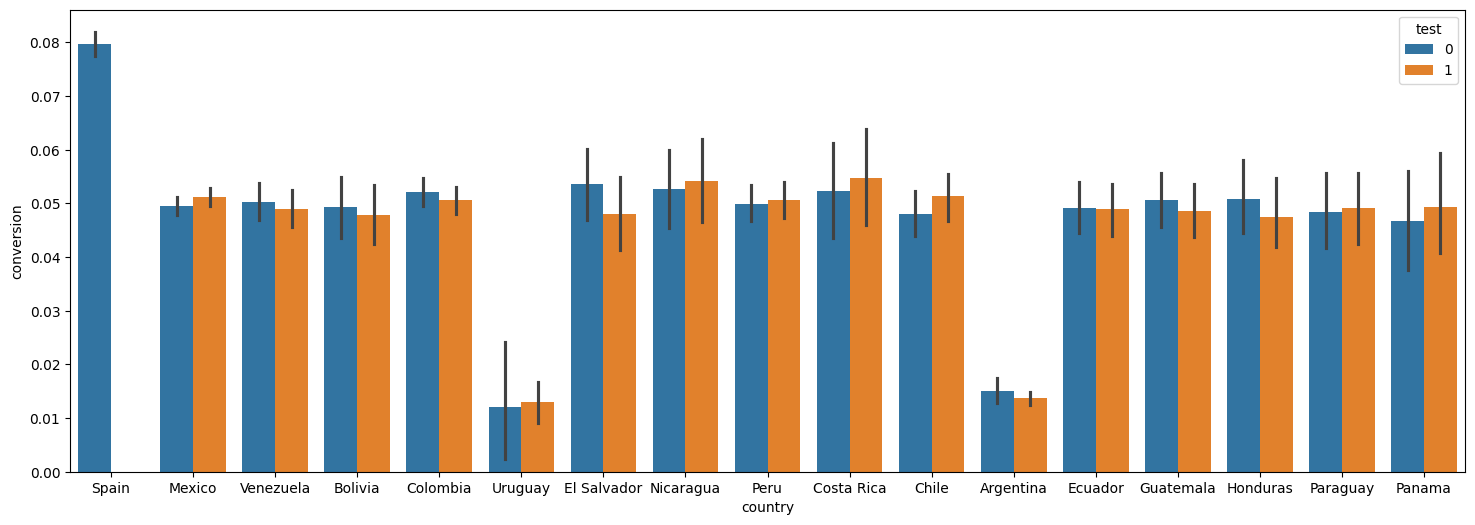

In [123]:
# conversion rate for each group
# conversion rate via country
country_0=control.groupby("country")["conversion"].mean().reset_index().sort_values("conversion",ascending=False)
country_1=test.groupby("country")["conversion"].mean().reset_index().sort_values("conversion",ascending=False)
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(x="country",y="conversion",hue="test",data=data,ax=ax)
plt.show()

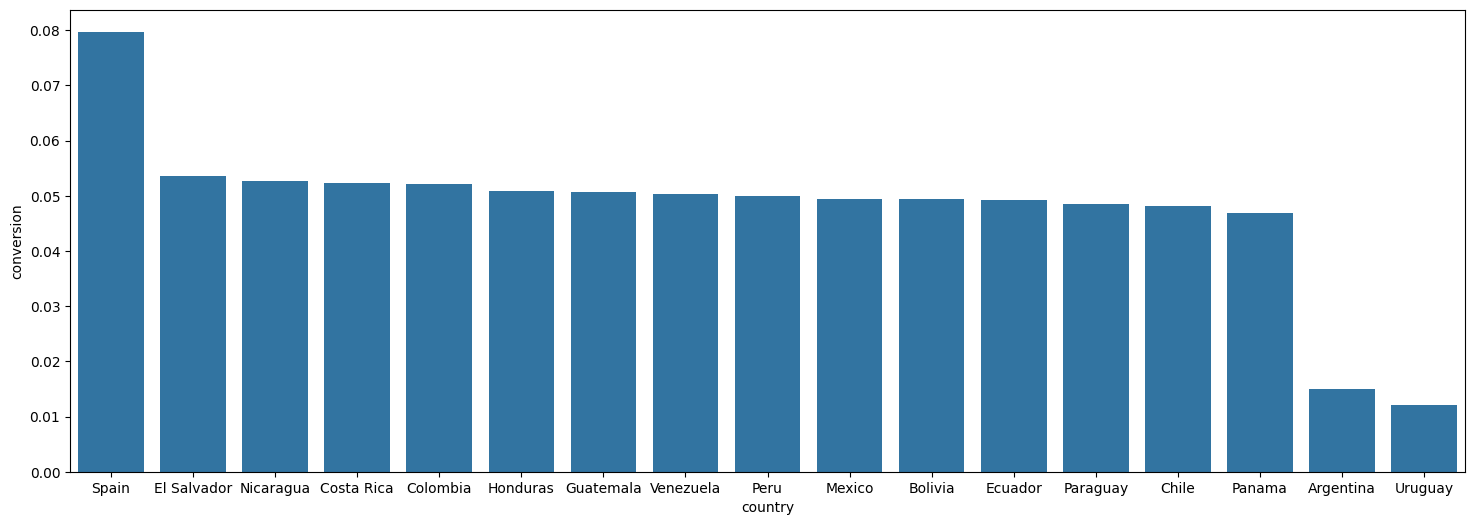

In [124]:
# control group per country 
fig, ax =plt.subplots(figsize=(18,6))    
sns.barplot(x="country",y="conversion",data=country_0, ax=ax)     
plt.show()   

In [125]:
# a/b test for each country : converstion rate is lower for test group
countries=data["country"].unique()
result=[]
#loop each country and perform mean value and prop ztest function
for country in countries:
    country_data=data[data["country"]==country]
    
    test_val=country_data[country_data["test"]==1]["conversion"].values
    cont_val=country_data[country_data["test"]==0]["conversion"].values
    
    test_conversions=test_val.sum()
    test_size=len(test_val)
    cont_conversions=cont_val.sum()
    cont_size=len(cont_val)

    # Perform two-proportion Z-test, 
    # count = [test_conversions, cont_conversions]
    # nobs = [test_size, cont_size]
    # stat, p_value = proportions_ztest(count, nobs)
    # simple t test
    stat, p_value=ttest_ind(test_val, cont_val)
    result.append({
        "country":country,
        "test_conversion":test_val.mean(),
        "test_size":len(test_val),
        "cont_conversions":cont_val.mean(),
        "cont_size":len(cont_val),
        "p_value":p_value
    })
result_df=pd.DataFrame(result)
result_df.sort_values(by="p_value")

# Most of these individual country-level p-values are not statistically significant. This suggests that, when considered on their own, the test group’s change (new translation) does not have a statistically significant effect on conversion rates in each individual country
# the contradictory of p value like a result of sample size, where large size increase statistic power

,country,test_conversion,test_size,cont_conversions,cont_size,p_value
1,Mexico,0.051186,64275,0.049495,64209,0.165547
6,El Salvador,0.047947,4067,0.053554,4108,0.248251
10,Chile,0.051295,9884,0.048107,9853,0.302871
11,Argentina,0.013725,37377,0.015071,9356,0.321766
4,Colombia,0.050571,26972,0.052089,27088,0.423733
14,Honduras,0.047540,4207,0.050906,4361,0.471721
13,Guatemala,0.048647,7503,0.050643,7622,0.572165
2,Venezuela,0.048978,15905,0.050344,16149,0.573740
9,Costa Rica,0.054738,2649,0.052256,2660,0.687863
16,Panama,0.049370,1985,0.046796,1966,0.705361


# other analysis
exam other feature level to verify, if any particular of them indicating different test/control pattern
conclusion:overall, test group has lower conversion rate across all feature levels

In [126]:
data = data[data['country'] != 'Spain']
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,other,Android_App,0,1,F,22.0,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,other,Android_App,0,0,M,35.0,Mexico


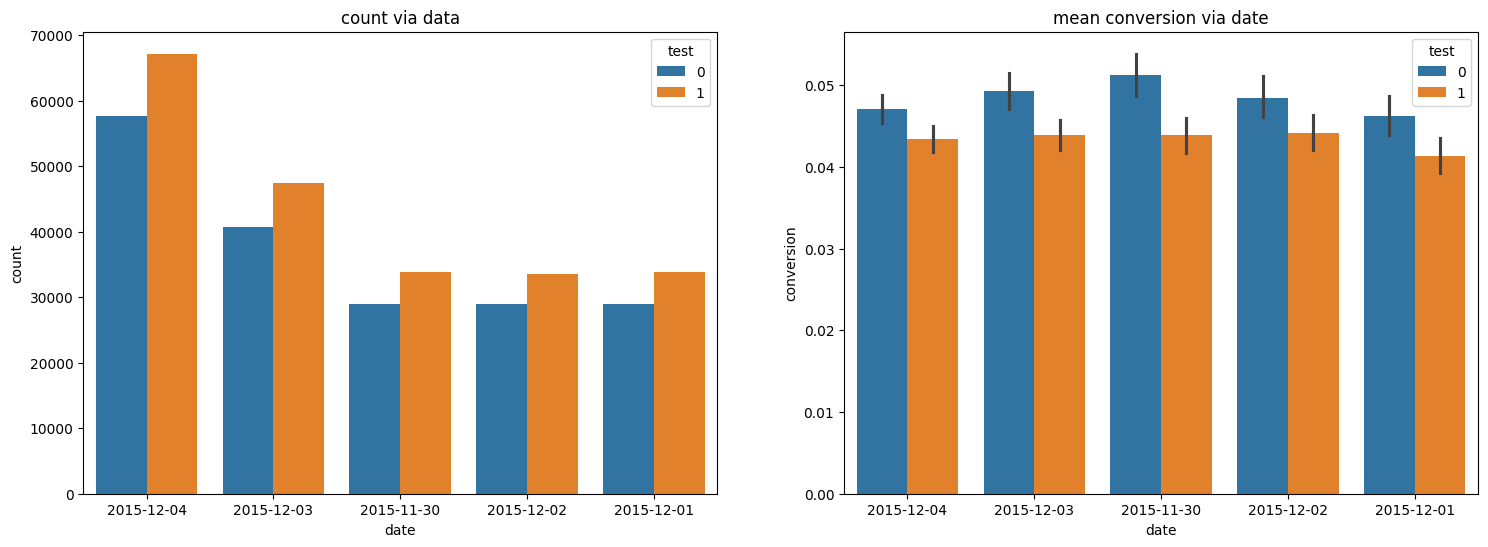

In [127]:
# by date?
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18,6))
sns.countplot(x="date",hue="test",data=data,ax=ax[0])
ax[0].set_title("count via data")

sns.barplot(x="date",y="conversion",hue="test",data=data,ax=ax[1])
ax[1].set_title("mean conversion via date")
plt.show()

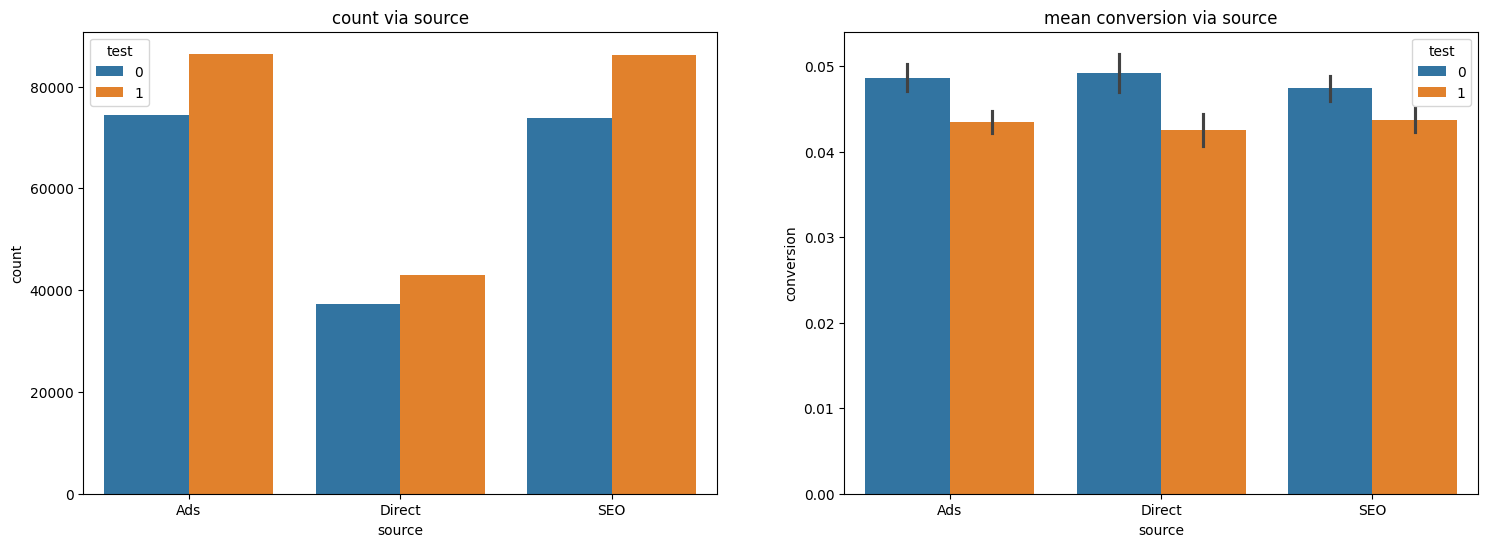

In [128]:
# by source
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18,6))
sns.countplot(x="source",hue="test",data=data,ax=ax[0])
ax[0].set_title("count via source")

sns.barplot(x="source",y="conversion",hue="test",data=data,ax=ax[1])
ax[1].set_title("mean conversion via source")
plt.show()


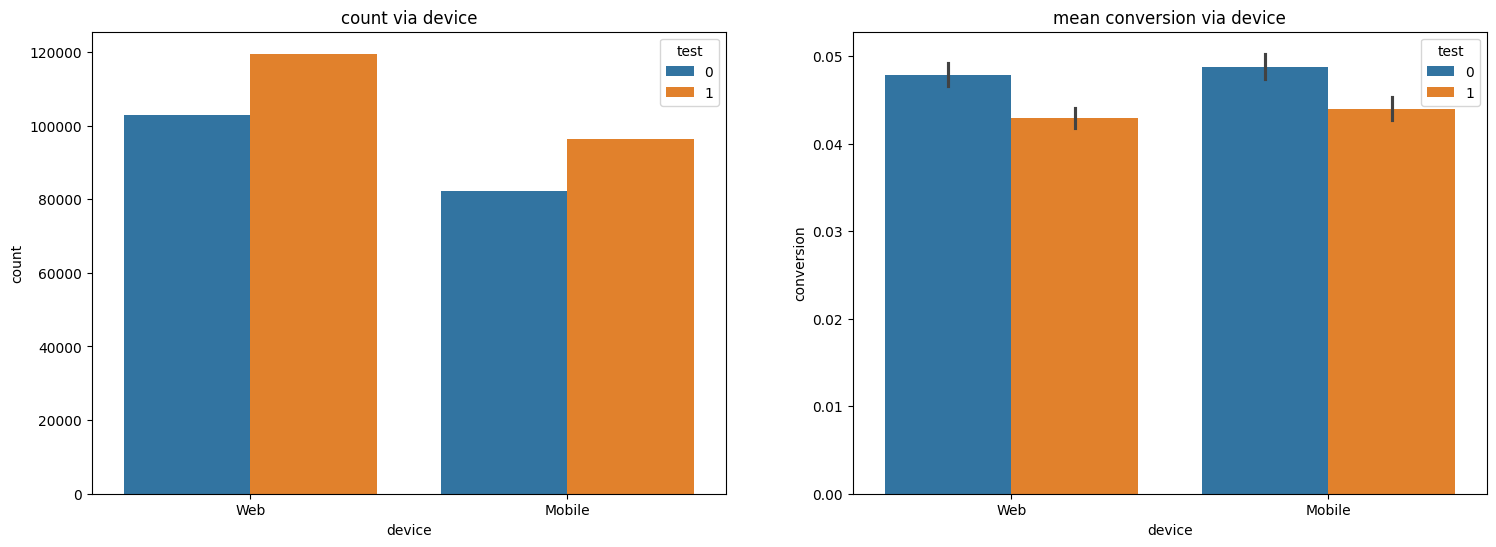

In [129]:
# by devices
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18,6))
sns.countplot(x="device",hue="test",data=data,ax=ax[0])
ax[0].set_title("count via device")

sns.barplot(x="device",y="conversion",hue="test",data=data,ax=ax[1])
ax[1].set_title("mean conversion via device")
plt.show()


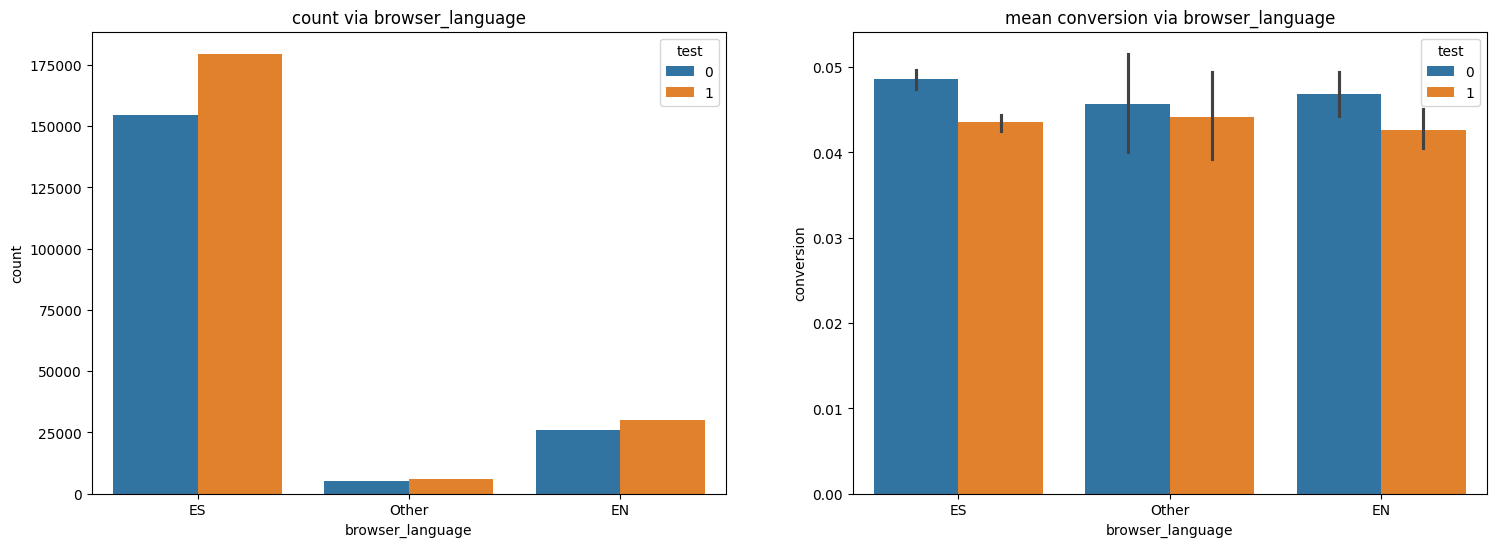

In [130]:
# by browser_language
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18,6))
sns.countplot(x="browser_language",hue="test",data=data,ax=ax[0])
ax[0].set_title("count via browser_language")

sns.barplot(x="browser_language",y="conversion",hue="test",data=data,ax=ax[1])
ax[1].set_title("mean conversion via browser_language")
plt.show()

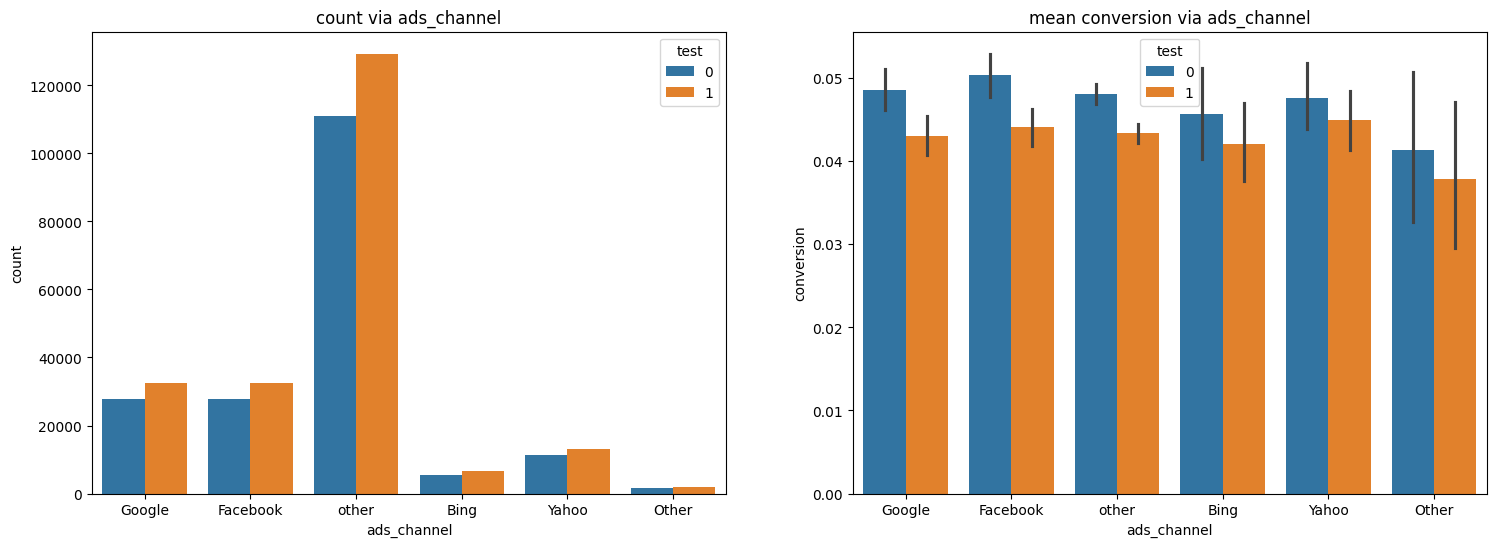

In [131]:
# by ads_channel
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18,6))
sns.countplot(x="ads_channel",hue="test",data=data,ax=ax[0])
ax[0].set_title("count via ads_channel")

sns.barplot(x="ads_channel",y="conversion",hue="test",data=data,ax=ax[1])
ax[1].set_title("mean conversion via ads_channel")
plt.show()

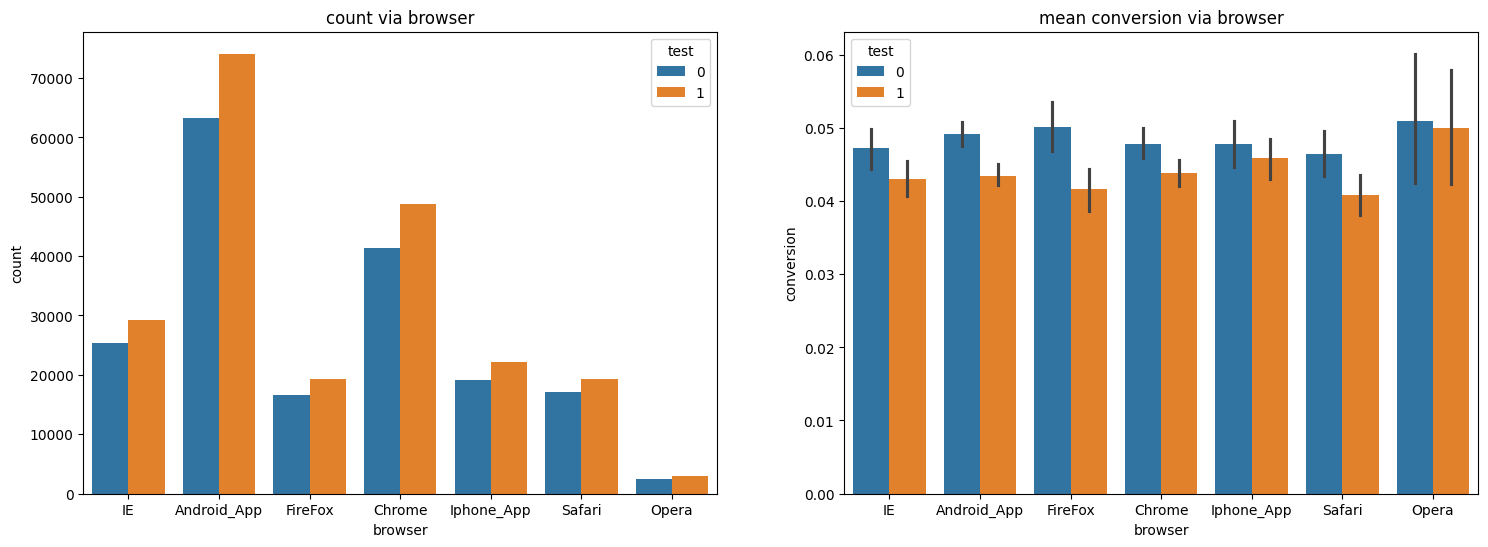

In [132]:
# by ads_channel
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18,6))
sns.countplot(x="browser",hue="test",data=data,ax=ax[0])
ax[0].set_title("count via browser")

sns.barplot(x="browser",y="conversion",hue="test",data=data,ax=ax[1])
ax[1].set_title("mean conversion via browser")
plt.show()